Iris classification
![](http://wildadirondacks.org/images/Adirondack-Wildflowers-Blue-Flag-Iris-Iris-versicolor-Cemetery-Road-Wetlands-12-June-2018-71.jpg)



# **Iris Flower Classification**

Picture yourself as a botanist in search of an automated method to categorize every Iris flower you encounter. Machine learning offers numerous algorithms for statistically classifying flowers. For example, an advanced machine learning system could classify flowers by analyzing photographs. However, our goals are simpler—we aim to classify Iris flowers based solely on the measurements of their sepals' and petals' length and width.

Although the Iris genus comprises approximately 300 species, our program focuses solely on classifying the following three:

Iris setosa
Iris virginica
Iris versicolor

# **Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

# **Load dataset**

In [2]:
#Load Data
iris = pd.read_csv('/content/iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

* There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
* There are no null values, so we don't have to worry about that.
* There are 50 observations of each species (setosa, versicolor, virginica).

In [5]:
# View bottom 5 records
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **Exploratory Data Analysis (EDA)**

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# **Data Visualization**

* After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
* There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

<ipython-input-27-80e770efc837>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris['petal_length'], shade=True)


<Axes: xlabel='petal_length', ylabel='Density'>

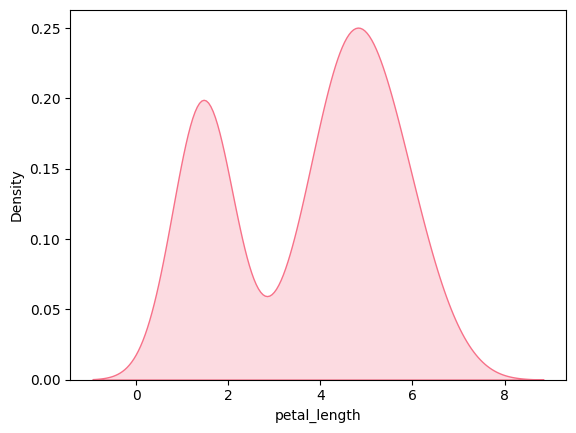

In [27]:
# KDE plot
sns.kdeplot(data=iris['petal_length'], shade=True)

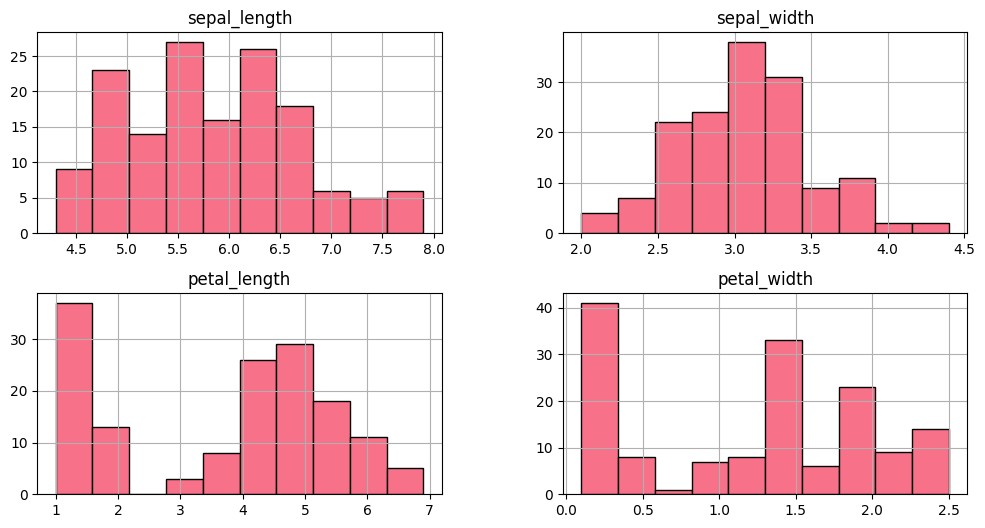

In [15]:
iris.hist(edgecolor='black')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

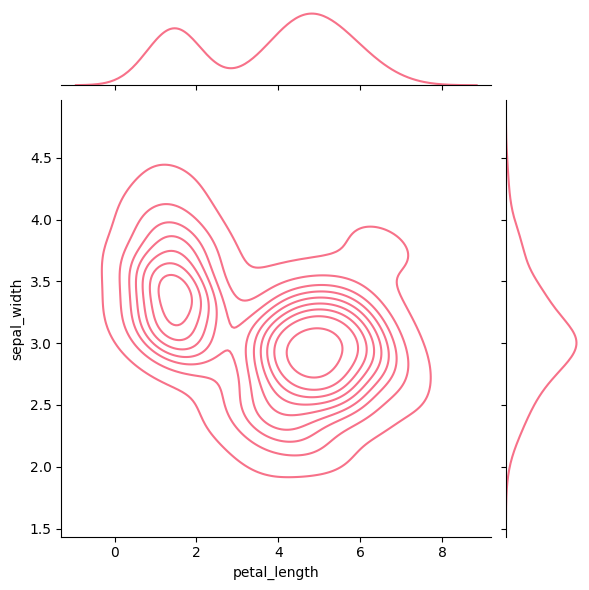

In [29]:
# 2D KDE plot
sns.jointplot(x=iris['petal_length'], y=iris['sepal_width'], kind="kde")

Text(0.5, 1.0, 'Histogram of Petal Lengths, by Species')

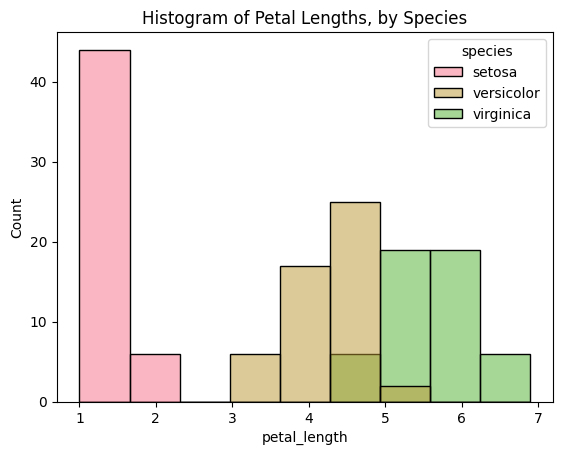

In [31]:
# Histograms for each species
sns.histplot(data=iris, x='petal_length', hue='species')

# Add title
plt.title("Histogram of Petal Lengths, by Species")



<ipython-input-34-5b97eb95db7a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris, x='petal_length', hue='species', shade=True)


Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

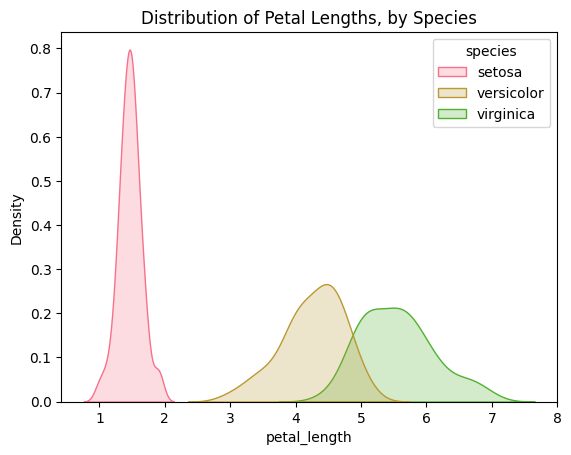

In [34]:
# KDE plots for each species
sns.kdeplot(data=iris, x='petal_length', hue='species', shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")


<ipython-input-32-fcac730423d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())


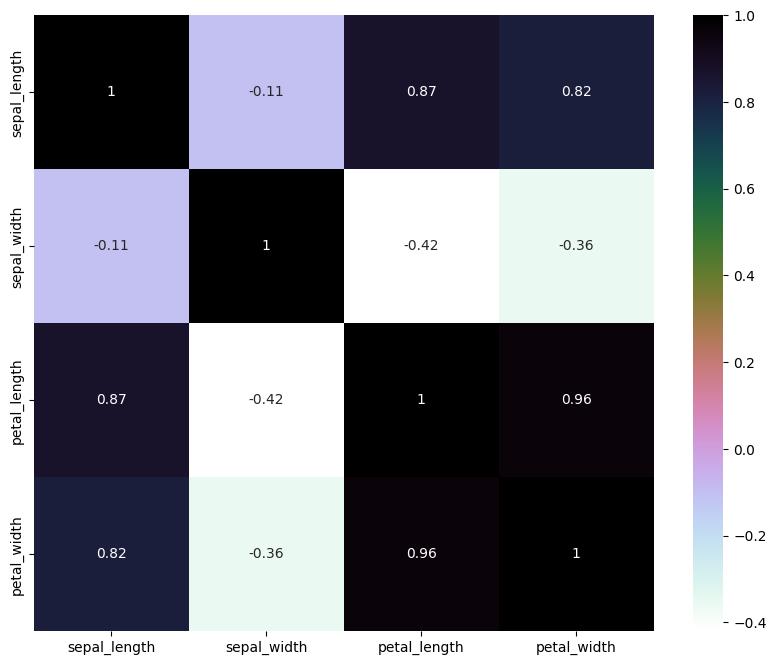

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import accuracy_score



In [69]:
# Define features (X) and target (y)
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [71]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [74]:
# Predict the labels for the test set
y_pred = logistic_regression_model.predict(X_test)

In [77]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the Logistic Regression is:", accuracy)

The accuracy of the Logistic Regression is: 0.9777777777777777


In [78]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
# Predictions for Decision Tree
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
print("Accuracy of Decision Tree:", dtree_accuracy)

Accuracy of Decision Tree: 0.9777777777777777
